In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as mt

import os

In [4]:
df = pd.read_csv('/Users/arth/Desktop/RP-MSDS/Spring2022/QTW/CaseStudy6/all_train.csv.gz', compression='gzip',
                   error_bad_lines=False)


In [5]:
df.head()

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,1.0,-0.346368,0.416306,0.999236,0.475342,0.427493,-0.005984,1.989833,0.344530,1.566297,...,4.105282,0.267826,0.378718,1.743123,3.406367,4.350537,-0.352571,1.130032,2.227706,1000.0
1,1.0,1.708236,-0.319394,-1.241873,-0.887231,-0.871906,-0.005984,-0.001047,-1.038225,0.655748,...,-1.178141,-0.877361,-1.483769,-0.573682,-1.693781,-0.545062,-0.299118,-0.662942,-0.193019,750.0
2,0.0,-0.360693,1.794174,0.264738,-0.472273,-0.292344,-1.054221,-1.150495,1.423404,1.270098,...,-1.199511,0.539020,-1.590629,-0.573682,-0.543636,-0.937456,-0.300344,-0.523262,-1.506304,750.0
3,1.0,-0.377914,-0.103932,-0.649434,-2.125015,-1.643797,-0.005984,1.011112,-1.040340,-0.541991,...,0.463763,-0.006583,1.089122,-0.573682,-0.276348,-0.409272,-0.349926,-0.307123,0.529698,1250.0
4,0.0,-0.067436,-0.636762,-0.620166,-0.062551,1.588715,-0.005984,-0.595304,-1.238987,0.336844,...,-0.552837,-1.418494,-0.562982,1.743123,0.881802,0.002516,1.560950,-0.150760,-1.023889,750.0


In [6]:
df.shape

(7000000, 29)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000000 entries, 0 to 6999999
Data columns (total 29 columns):
 #   Column   Dtype  
---  ------   -----  
 0   # label  float64
 1   f0       float64
 2   f1       float64
 3   f2       float64
 4   f3       float64
 5   f4       float64
 6   f5       float64
 7   f6       float64
 8   f7       float64
 9   f8       float64
 10  f9       float64
 11  f10      float64
 12  f11      float64
 13  f12      float64
 14  f13      float64
 15  f14      float64
 16  f15      float64
 17  f16      float64
 18  f17      float64
 19  f18      float64
 20  f19      float64
 21  f20      float64
 22  f21      float64
 23  f22      float64
 24  f23      float64
 25  f24      float64
 26  f25      float64
 27  f26      float64
 28  mass     float64
dtypes: float64(29)
memory usage: 1.5 GB


In [8]:
df.describe()

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
count,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,...,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06
mean,5.001256e-01,1.612528e-02,4.770022e-04,2.686578e-05,1.056081e-02,-1.050026e-04,2.765919e-03,1.815953e-02,2.510948e-05,4.345870e-04,...,1.164789e-02,-1.127097e-04,7.686731e-05,2.909202e-04,1.228774e-02,9.778378e-03,5.269844e-03,-1.760961e-03,1.533136e-02,1.000107e+03
std,5.000000e-01,1.004417e+00,9.974864e-01,1.000080e+00,9.956003e-01,9.998670e-01,1.000957e+00,9.867746e-01,9.965867e-01,1.000007e+00,...,1.002725e+00,1.000038e+00,1.000033e+00,1.000170e+00,1.010477e+00,1.005418e+00,1.009990e+00,9.844511e-01,9.822799e-01,3.534255e+02
min,0.000000e+00,-1.960549e+00,-2.365355e+00,-1.732165e+00,-9.980274e+00,-1.732137e+00,-1.054221e+00,-3.034787e+00,-2.757853e+00,-1.732359e+00,...,-1.728284e+00,-2.281867e+00,-1.731758e+00,-5.736825e-01,-3.631608e+00,-4.729473e+00,-2.062223e+01,-3.452634e+00,-2.632761e+00,5.000000e+02
25%,0.000000e+00,-7.288206e-01,-7.332548e-01,-8.656704e-01,-6.092291e-01,-8.658025e-01,-1.054221e+00,-7.566092e-01,-7.014146e-01,-8.656543e-01,...,-7.423630e-01,-7.206846e-01,-8.656855e-01,-5.736825e-01,-5.417942e-01,-5.115522e-01,-3.543870e-01,-6.925097e-01,-7.943804e-01,7.500000e+02
50%,1.000000e+00,-3.930319e-02,8.523957e-04,3.199154e-04,1.963316e-02,-5.070131e-04,-5.983562e-03,-1.499527e-01,-1.067553e-04,1.384781e-03,...,-8.992496e-02,-6.735953e-05,-4.424527e-04,-5.736825e-01,-1.602760e-01,-3.144032e-01,-3.265228e-01,-3.570301e-01,-8.828640e-02,1.000000e+03
75%,1.000000e+00,6.900799e-01,7.347832e-01,8.659464e-01,6.798818e-01,8.657646e-01,8.504885e-01,7.686690e-01,7.013194e-01,8.665976e-01,...,6.423185e-01,7.204921e-01,8.659566e-01,-5.736825e-01,4.812194e-01,1.634892e-01,-2.337671e-01,4.753128e-01,7.610846e-01,1.250000e+03
max,1.000000e+00,4.378282e+00,2.365287e+00,1.732370e+00,4.148023e+00,1.731978e+00,4.482618e+00,3.720345e+00,2.758590e+00,1.731450e+00,...,5.866367e+00,2.282217e+00,1.732740e+00,1.743123e+00,7.293420e+00,9.333287e+00,1.499064e+01,5.277313e+00,4.444690e+00,1.500000e+03


In [9]:
df.columns

Index(['# label', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19',
       'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'mass'],
      dtype='object')

In [10]:
df['# label'].unique()
# 1 for detection of new particle 
# 0 for no new particle detection

array([1., 0.])

In [11]:
df=df.rename(columns={'# label':'target'})

In [12]:
df.isnull().sum()

target    0
f0        0
f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
f8        0
f9        0
f10       0
f11       0
f12       0
f13       0
f14       0
f15       0
f16       0
f17       0
f18       0
f19       0
f20       0
f21       0
f22       0
f23       0
f24       0
f25       0
f26       0
mass      0
dtype: int64

In [13]:
df.columns

Index(['target', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19',
       'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'mass'],
      dtype='object')

array([[<AxesSubplot:title={'center':'target'}>,
        <AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f1'}>,
        <AxesSubplot:title={'center':'f2'}>,
        <AxesSubplot:title={'center':'f3'}>],
       [<AxesSubplot:title={'center':'f4'}>,
        <AxesSubplot:title={'center':'f5'}>,
        <AxesSubplot:title={'center':'f6'}>,
        <AxesSubplot:title={'center':'f7'}>,
        <AxesSubplot:title={'center':'f8'}>],
       [<AxesSubplot:title={'center':'f9'}>,
        <AxesSubplot:title={'center':'f10'}>,
        <AxesSubplot:title={'center':'f11'}>,
        <AxesSubplot:title={'center':'f12'}>,
        <AxesSubplot:title={'center':'f13'}>],
       [<AxesSubplot:title={'center':'f14'}>,
        <AxesSubplot:title={'center':'f15'}>,
        <AxesSubplot:title={'center':'f16'}>,
        <AxesSubplot:title={'center':'f17'}>,
        <AxesSubplot:title={'center':'f18'}>],
       [<AxesSubplot:title={'center':'f19'}>,
        <AxesSubplot:title={'center':

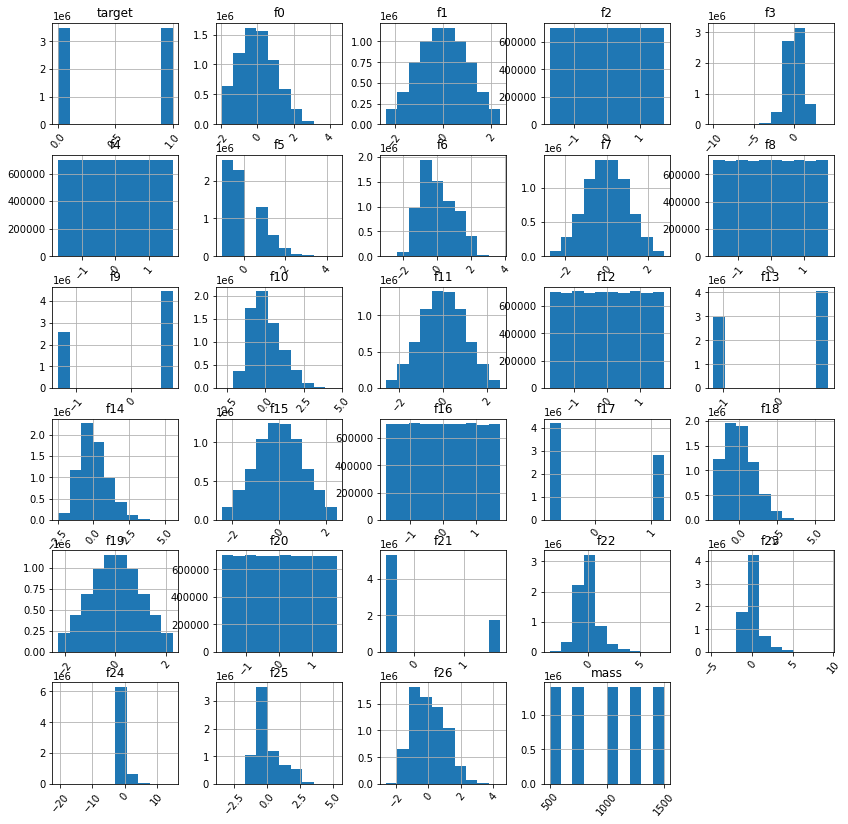

In [14]:
df.hist(figsize=(14,14), xrot=50)

In [15]:
# Create correlation matrix

corr_mat = df.corr(method='pearson')
  
# Convert correlation matrix to 1-D Series and sort
sorted_mat = corr_mat.unstack().sort_values()



In [16]:
pd.set_option('display.max_rows',841)
pd.DataFrame(data=sorted_mat)


0
f13    f17    -0.374528
f17    f13    -0.374528
f9     f17    -0.329949
f17    f9     -0.329949
f9     f21    -0.307213
f21    f9     -0.307213
       f13    -0.306429
f13    f21    -0.306429
f8     f12    -0.238242
f12    f8     -0.238242
f8     f4     -0.233003
f4     f8     -0.233003
f2     f8     -0.232319
f8     f2     -0.232319
f17    f21    -0.205639
f21    f17    -0.205639
f22    f5     -0.195117
f5     f22    -0.195117
       f23    -0.188721
f23    f5     -0.188721
f9     f13    -0.183743
f13    f9     -0.183743
f22    f9     -0.155551
f9     f22    -0.155551
f13    f18    -0.148374
f18    f13    -0.148374
       f9     -0.146027
f9     f18    -0.146027
       f5     -0.143509
f5     f9     -0.143509
f13    f5     -0.137170
f5     f13    -0.137170
f16    f8     -0.106186
f8     f16    -0.106186
f22    f13    -0.103286
f13    f22    -0.103286
       f14    -0.100658
f14    f13    -0.100658
       f9     -0.092139
f9     f14    -0.092139
f2     f20    -0.092043
f20    f2     -0.092043
f16    f2     -0.091000
f2     f16    -0.091000
f25    f21    -0.077928
f21    f25    -0.077928
f17    f25    -0.076047
f25    f17    -0.076047
f12    f16    -0.069918
f16    f12    -0.069918
f4     f20    -0.068271
f20    f4     -0.068271
f13    f26    -0.066454
f26    f13    -0.066454
f4     f16    -0.065579
f16    f4     -0.065579
f0     f13    -0.057995
f13    f0     -0.057995
f16    f20    -0.055865
f20    f16    -0.055865
f25    f13    -0.055174
f13    f25    -0.055174
f12    f20    -0.054172
f20    f12    -0.054172
f8     f20    -0.051674
f20    f8     -0.051674
f9     f26    -0.049122
f26    f9     -0.049122
f5     f17    -0.042581
f17    f5     -0.042581
f9     f0     -0.039924
f0     f9     -0.039924
f17    f6     -0.038356
f6     f17    -0.038356
f2     f12    -0.036190
f12    f2     -0.036190
f21    f6     -0.034123
f6     f21    -0.034123
mass   f21    -0.028898
f21    mass   -0.028898
mass   f17    -0.028210
f17    mass   -0.028210
       f10    -0.027981
f10    f17    -0.027981
       f21    -0.024445
f21    f10    -0.024445
f13    f3     -0.024117
f3     f13    -0.024117
       f9     -0.021872
f9     f3     -0.021872
f13    f24    -0.018679
f24    f13    -0.018679
f23    f9     -0.015394
f9     f23    -0.015394
f21    target -0.014163
target f21    -0.014163
       f17    -0.013426
f17    target -0.013426
f9     f10    -0.010329
f10    f9     -0.010329
f17    f26    -0.009786
f26    f17    -0.009786
f18    f17    -0.005241
f17    f18    -0.005241
f9     target -0.002658
target f9     -0.002658
f13    target -0.002288
target f13    -0.002288
f4     f12    -0.001119
f12    f4     -0.001119
f25    f11    -0.001009
f11    f25    -0.001009
f12    f19    -0.000859
f19    f12    -0.000859
f12    target -0.000724
target f12    -0.000724
f24    f9     -0.000711
f9     f24    -0.000711
f6     f12    -0.000685
f12    f6     -0.000685
       f10    -0.000684
f10    f12    -0.000684
f12    mass   -0.000672
mass   f12    -0.000672
f8     f5     -0.000671
f5     f8     -0.000671
f23    f11    -0.000661
f11    f23    -0.000661
f20    f0     -0.000617
f0     f20    -0.000617
f11    f20    -0.000590
f20    f11    -0.000590
mass   f11    -0.000577
f11    mass   -0.000577
       f0     -0.000564
f0     f11    -0.000564
f12    f14    -0.000562
f14    f12    -0.000562
f11    f24    -0.000559
f24    f11    -0.000559
f1     f0     -0.000556
f0     f1     -0.000556
f11    f22    -0.000509
f22    f11    -0.000509
f8     f17    -0.000477
f17    f8     -0.000477
f0     f4     -0.000464
f4     f0     -0.000464
f3     f12    -0.000460
f12    f3     -0.000460
       f15    -0.000453
f15    f12    -0.000453
f12    f23    -0.000447
f23    f12    -0.000447
f21    f20    -0.000442
f20    f21    -0.000442
f2     f6     -0.000436
f6     f2     -0.000436
f7     f4     -0.000435
f4     f7     -0.000435
f2     f9     -0.000426
f9     f2     -0.000426
f23    f19    -0.000421
f19    f23    -0.000421
f26    f11    -0.000406
f11    f26    -0.000406
f26    f12    

Text(0.5, 1.0, 'Correlation Heatmap')

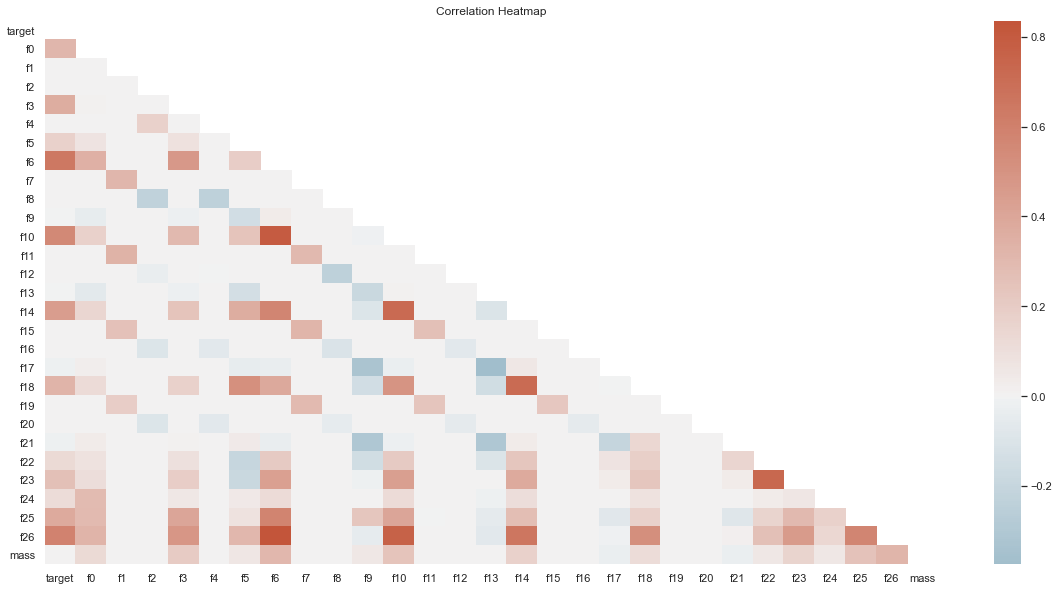

In [17]:
import seaborn as sns
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
hm=sns.heatmap(corr, mask=mask, cmap=cmap, center=0)
hm.set_title('Correlation Heatmap')

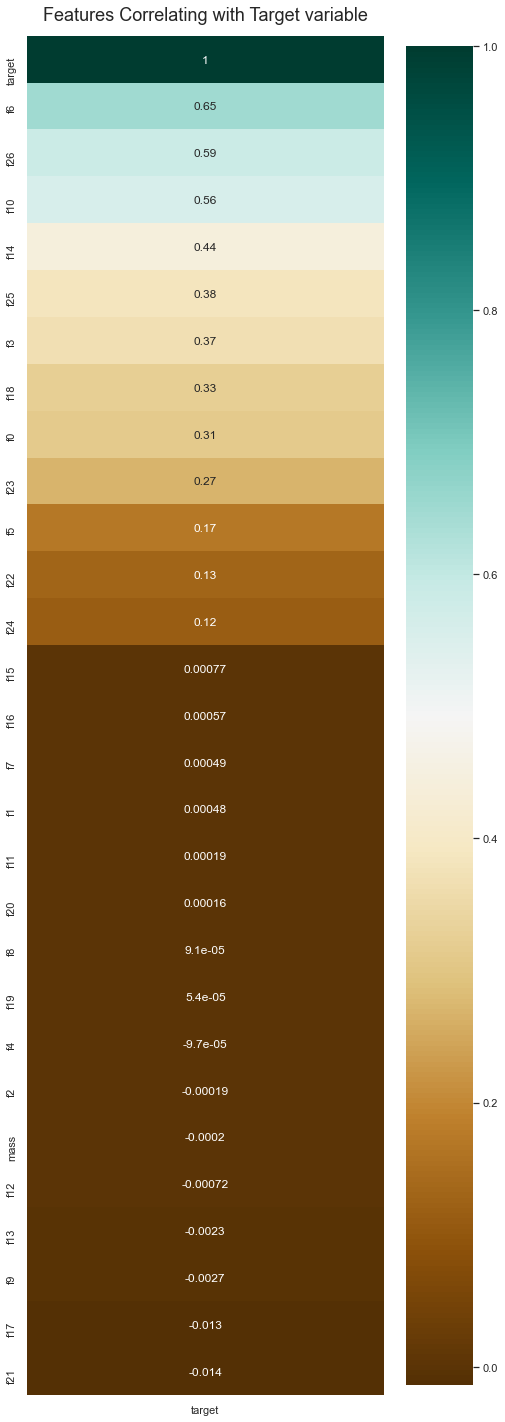

In [18]:
plt.figure(figsize=(8, 25))
heatmap = sns.heatmap(df.corr()[['target']].sort_values(by='target', ascending=False), annot=True, cmap='BrBG')
heatmap.set_title("Features Correlating with Target variable", fontdict={'fontsize':18}, pad=16);

In [19]:
data= df[['target', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19',
       'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'mass']].sample(n=10000)
data.shape

(10000, 29)

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
cl3 = data.drop(['target'], axis=1)
new_data = pd.DataFrame()
new_data["feature"] = cl3.columns
  
# calculating VIF for each feature
new_data["VIF"] = [variance_inflation_factor(cl3.values, i)
                          for i in range(len(cl3.columns))]
print(new_data)

   feature       VIF
0       f0  1.409724
1       f1  1.215928
2       f2  1.109594
3       f3  1.539671
4       f4  1.095592
5       f5  1.875316
6       f6  5.195556
7       f7  1.302783
8       f8  1.242141
9       f9  2.980301
10     f10  4.400532
11     f11  1.235273
12     f12  1.101593
13     f13  2.925552
14     f14  3.418446
15     f15  1.180009
16     f16  1.059879
17     f17  2.836399
18     f18  2.588498
19     f19  1.150251
20     f20  1.039089
21     f21  2.409318
22     f22  2.431815
23     f23  3.007470
24     f24  1.111648
25     f25  1.854704
26     f26  5.126119
27    mass  1.021275


In [21]:
new_df=df.drop(['f6','f26'],axis=1)
new_df.shape

(7000000, 27)

<Figure size 2160x3600 with 0 Axes>

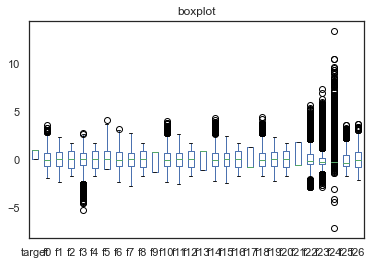

In [22]:
# Plot the dataframe
plt.figure(figsize=(30,50))
ax = data[['target', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19',
       'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26']].plot(kind='box', title='boxplot')

# Display the plot
plt.show()

1.0    3500879
0.0    3499121
Name: target, dtype: int64


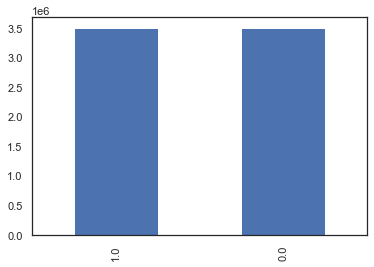

In [23]:
# checking the balance of the target variables - it is well balanced
df['target'].value_counts().plot(kind='bar')
print(df['target'].value_counts())

In [24]:
#New particles are slightly higher than no particle
df.groupby(['target']).size()

target
0.0    3499121
1.0    3500879
dtype: int64

### Scaling the data using MinMaxScaler

In [25]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(new_df)

# Print out the adjustment that the scaler applied to the total_earnings column of data
print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[7], scaler.min_[7]))
multiplied_by = scaler.scale_[7]
added = scaler.min_[7]

scaled_train_df = pd.DataFrame(scaled_train, columns=new_df.columns.values)

Note: median values were scaled by multiplying by 0.1812762157 and adding 0.499933


In [26]:
X = scaled_train_df.loc[:, scaled_train_df.columns != 'target'].values

y = scaled_train_df['target'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=30)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4690000, 26)
(2310000, 26)
(4690000,)
(2310000,)


## Logistic Regression Model

## Modeling using Neural Networks

### Model with 3 hidden layers and sigmoid as the activation function

In [25]:
model=tf.keras.Sequential()
model.add(tf.keras.Input(shape=(26,)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [26]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3456      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 69,505
Trainable params: 69,505
Non-trainable params: 0
_________________________________________________________________


#### Compiling the model using Adam optimizer and binary cross entropy loss

In [27]:
model.compile(optimizer='adam',loss='binary_crossentropy',
                   metrics=['accuracy',tf.keras.metrics.Precision(),
                            tf.keras.metrics.Recall(),
                            tf.keras.metrics.AUC()])

In [28]:
es = EarlyStopping(patience=2)
model.fit(X_train, y_train, epochs=50, validation_data=(X_test,y_test), batch_size=1000,callbacks=[es])

Epoch 1/50
4690/4690 [==============================] - 28s 5ms/step - loss: 0.3296 - accuracy: 0.8450 - precision: 0.8271 - recall: 0.8726 - auc: 0.9311 - val_loss: 0.2985 - val_accuracy: 0.8620 - val_precision: 0.8389 - val_recall: 0.8960 - val_auc: 0.9437
Epoch 2/50
4690/4690 [==============================] - 21s 5ms/step - loss: 0.2963 - accuracy: 0.8633 - precision: 0.8473 - recall: 0.8866 - auc: 0.9444 - val_loss: 0.2922 - val_accuracy: 0.8657 - val_precision: 0.8433 - val_recall: 0.8980 - val_auc: 0.9461
Epoch 3/50
4690/4690 [==============================] - 22s 5ms/step - loss: 0.2905 - accuracy: 0.8665 - precision: 0.8504 - recall: 0.8897 - auc: 0.9466 - val_loss: 0.2899 - val_accuracy: 0.8672 - val_precision: 0.8667 - val_recall: 0.8678 - val_auc: 0.9478
Epoch 4/50
4690/4690 [==============================] - 22s 5ms/step - loss: 0.2869 - accuracy: 0.8687 - precision: 0.8524 - recall: 0.8921 - auc: 0.9479 - val_loss: 0.2842 - val_accuracy: 0.8703 - val_precision: 0.8553 - v

#### Graph- Training and Validation Loss using Adam optimizer

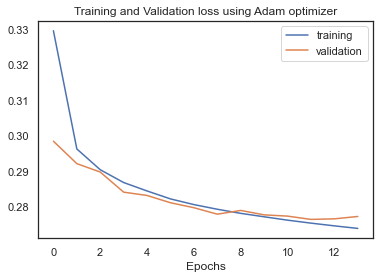

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Epochs')
plt.legend(['training','validation'])
plt.title('Training and Validation loss using Adam optimizer')
plt.show()

#### Graph- Training and Validation Accuracy using Adam optimizer

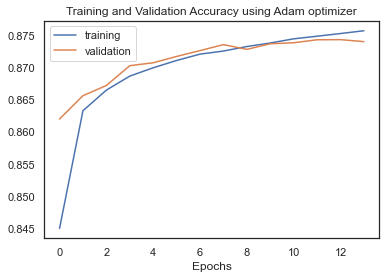

In [30]:
train_loss = model.history.history['accuracy']
val_loss = model.history.history['val_accuracy']
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Epochs')
plt.legend(['training','validation'])
plt.title('Training and Validation Accuracy using Adam optimizer')
plt.show()

#### Predicting values on NN with 3 hidden layers, ReLU activation and Adam optimizer

In [33]:
ypred1=model.predict(X_test)
print(mt.classification_report(y_test, np.rint(ypred1)))
print('\n')
print('Confusion Matrix: \n', mt.confusion_matrix(y_test, np.rint(ypred1)))
print('\n')
print('Accuracy: \n', mt.accuracy_score(y_test, np.rint(ypred1)))

              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87   1155635
         1.0       0.85      0.91      0.88   1154365

    accuracy                           0.87   2310000
   macro avg       0.88      0.87      0.87   2310000
weighted avg       0.88      0.87      0.87   2310000



Confusion Matrix: 
 [[ 972743  182892]
 [ 107977 1046388]]


Accuracy: 
 0.874082683982684


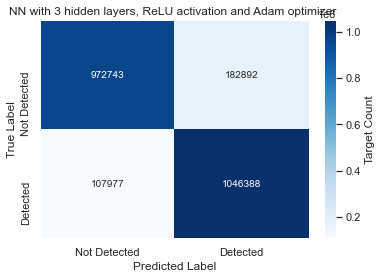

In [66]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm_1 = confusion_matrix(y_test, np.rint(ypred1))
ax = plt.axes()
x_axis_labels = ['Not Detected', 'Detected']
y_axis_labels = ['Not Detected', 'Detected']
sns.heatmap(cm_1, cmap='Blues', annot=True, fmt='d',xticklabels=x_axis_labels,
            yticklabels=y_axis_labels, ax=ax, cbar_kws={'label': 'Target Count',})
ax.set_title('NN with 3 hidden layers, ReLU activation and Adam optimizer ')
plt.xlabel("Predicted Label")
plt.ylabel("True Label") 
plt.show()

In [35]:
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, np.rint(ypred1))
auc_keras1 = auc(nn_fpr_keras, nn_tpr_keras)
auc_keras1

0.8741004758131702

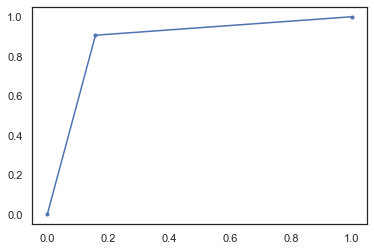

In [36]:
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras1)


#### Compiling the model using SGD optimizer and binary cross entropy loss

In [37]:
model.compile(optimizer='sgd',loss='binary_crossentropy',
                   metrics=['accuracy',tf.keras.metrics.Precision(),
                            tf.keras.metrics.Recall(),
                            tf.keras.metrics.AUC()])

In [38]:
es = EarlyStopping(patience=2)
model.fit(X_train, y_train, epochs=50, validation_data=(X_test,y_test), batch_size=1000,callbacks=[es])

Epoch 1/50
4690/4690 [==============================] - 24s 5ms/step - loss: 0.2686 - accuracy: 0.8786 - precision_1: 0.8622 - recall_1: 0.9016 - auc_1: 0.9545 - val_loss: 0.2718 - val_accuracy: 0.8770 - val_precision_1: 0.8614 - val_recall_1: 0.8985 - val_auc_1: 0.9534
Epoch 2/50
4690/4690 [==============================] - 21s 5ms/step - loss: 0.2680 - accuracy: 0.8789 - precision_1: 0.8624 - recall_1: 0.9018 - auc_1: 0.9547 - val_loss: 0.2716 - val_accuracy: 0.8771 - val_precision_1: 0.8617 - val_recall_1: 0.8983 - val_auc_1: 0.9534
Epoch 3/50
4690/4690 [==============================] - 22s 5ms/step - loss: 0.2678 - accuracy: 0.8791 - precision_1: 0.8625 - recall_1: 0.9021 - auc_1: 0.9548 - val_loss: 0.2715 - val_accuracy: 0.8771 - val_precision_1: 0.8587 - val_recall_1: 0.9027 - val_auc_1: 0.9535
Epoch 4/50
4690/4690 [==============================] - 21s 5ms/step - loss: 0.2677 - accuracy: 0.8791 - precision_1: 0.8626 - recall_1: 0.9021 - auc_1: 0.9548 - val_loss: 0.2715 - val_ac

#### Graph- Training and Validation Loss using SGD optimizer

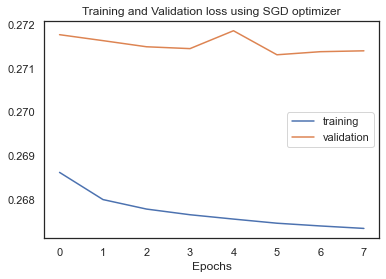

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Epochs')
plt.title('Training and Validation loss using SGD optimizer')
plt.legend(['training','validation'])
plt.show()

#### Graph- Training and Validation Accuracy using SGD optimizer

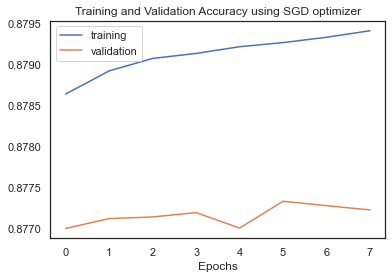

In [40]:
train_loss = model.history.history['accuracy']
val_loss = model.history.history['val_accuracy']
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Epochs')
plt.legend(['training','validation'])
plt.title('Training and Validation Accuracy using SGD optimizer')
plt.show()

In [41]:
ypred2=model.predict(X_test)
print(mt.classification_report(y_test, np.rint(ypred2)))
print('\n')
print('Confusion Matrix: \n', mt.confusion_matrix(y_test, np.rint(ypred2)))
print('\n')
print('Accuracy: \n', mt.accuracy_score(y_test, np.rint(ypred2)))



              precision    recall  f1-score   support

         0.0       0.90      0.85      0.87   1155635
         1.0       0.86      0.90      0.88   1154365

    accuracy                           0.88   2310000
   macro avg       0.88      0.88      0.88   2310000
weighted avg       0.88      0.88      0.88   2310000



Confusion Matrix: 
 [[ 983683  171952]
 [ 111657 1042708]]


Accuracy: 
 0.8772255411255411


<function matplotlib.pyplot.show(close=None, block=None)>

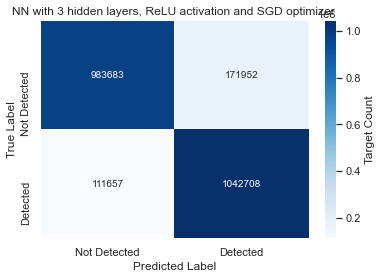

In [67]:
cm_2 = confusion_matrix(y_test, np.rint(ypred2))
ax = plt.axes()
x_axis_labels = ['Not Detected', 'Detected']
y_axis_labels = ['Not Detected', 'Detected']
sns.heatmap(cm_2, cmap='Blues', annot=True, fmt='d',xticklabels=x_axis_labels,
            yticklabels=y_axis_labels, ax=ax, cbar_kws={'label': 'Target Count',})
ax.set_title('NN with 3 hidden layers, ReLU activation and SGD optimizer ')
plt.xlabel("Predicted Label")
plt.ylabel("True Label") 
plt.show

In [68]:
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, np.rint(ypred2))
auc_keras2 = auc(nn_fpr_keras, nn_tpr_keras)
auc_keras2



0.8772398543224753

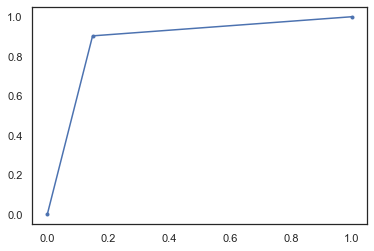

In [69]:
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras2)


### Model with 5 hidden layers and sigmoid activation function

In [44]:
model2=tf.keras.Sequential()
model2.add(tf.keras.Input(shape=(26,)))
model2.add(tf.keras.layers.Dense(1024,activation='relu'))
model2.add(tf.keras.layers.Dense(512,activation='relu'))
model2.add(tf.keras.layers.Dense(256,activation='relu'))
model2.add(tf.keras.layers.Dense(128,activation='relu'))
model2.add(tf.keras.layers.Dense(64,activation='relu'))
model2.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [45]:
model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1024)              27648     
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 724,993
Trainable params: 724,993
Non-tr

In [46]:
model2.compile(optimizer='adam',loss='binary_crossentropy',
                   metrics=['accuracy',tf.keras.metrics.Precision(),
                            tf.keras.metrics.Recall(),
                            tf.keras.metrics.AUC()])

In [47]:
es = EarlyStopping(patience=2)
model2.fit(X_train, y_train, epochs=50, validation_data=(X_test,y_test), batch_size=1000,callbacks=[es])

Epoch 1/50
4690/4690 [==============================] - 148s 31ms/step - loss: 0.3155 - accuracy: 0.8527 - precision_2: 0.8349 - recall_2: 0.8794 - auc_2: 0.9369 - val_loss: 0.2969 - val_accuracy: 0.8627 - val_precision_2: 0.8237 - val_recall_2: 0.9227 - val_auc_2: 0.9459
Epoch 2/50
4690/4690 [==============================] - 141s 30ms/step - loss: 0.2908 - accuracy: 0.8665 - precision_2: 0.8493 - recall_2: 0.8913 - auc_2: 0.9465 - val_loss: 0.2850 - val_accuracy: 0.8696 - val_precision_2: 0.8569 - val_recall_2: 0.8872 - val_auc_2: 0.9487
Epoch 3/50
4690/4690 [==============================] - 142s 30ms/step - loss: 0.2855 - accuracy: 0.8696 - precision_2: 0.8527 - recall_2: 0.8937 - auc_2: 0.9485 - val_loss: 0.2825 - val_accuracy: 0.8711 - val_precision_2: 0.8638 - val_recall_2: 0.8808 - val_auc_2: 0.9498
Epoch 4/50
4690/4690 [==============================] - 144s 31ms/step - loss: 0.2819 - accuracy: 0.8714 - precision_2: 0.8548 - recall_2: 0.8951 - auc_2: 0.9498 - val_loss: 0.2801 

#### Graph-Training and Validation Loss using Adam optimizer

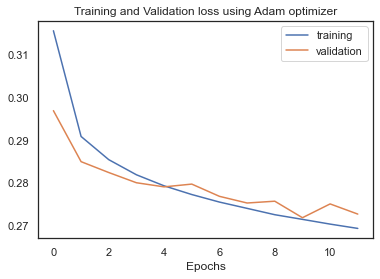

In [48]:
train_loss = model2.history.history['loss']
val_loss = model2.history.history['val_loss']
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Epochs')
plt.legend(['training','validation'])
plt.title('Training and Validation loss using Adam optimizer')
plt.show()

#### Graph-Training and Validation Accuracy using Adam optimizer

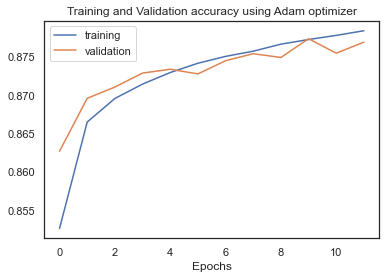

In [49]:
train_loss = model2.history.history['accuracy']
val_loss = model2.history.history['val_accuracy']
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Epochs')
plt.legend(['training','validation'])
plt.title('Training and Validation accuracy using Adam optimizer')
plt.show()

In [50]:
ypred3=model2.predict(X_test)
print(mt.classification_report(y_test, np.rint(ypred3)))
print('\n')
print('Confusion Matrix: \n', mt.confusion_matrix(y_test, np.rint(ypred3)))
print('\n')
print('Accuracy: \n', mt.accuracy_score(y_test, np.rint(ypred3)))


              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87   1155635
         1.0       0.85      0.91      0.88   1154365

    accuracy                           0.88   2310000
   macro avg       0.88      0.88      0.88   2310000
weighted avg       0.88      0.88      0.88   2310000



Confusion Matrix: 
 [[ 974564  181071]
 [ 103266 1051099]]


Accuracy: 
 0.8769103896103896


<function matplotlib.pyplot.show(close=None, block=None)>

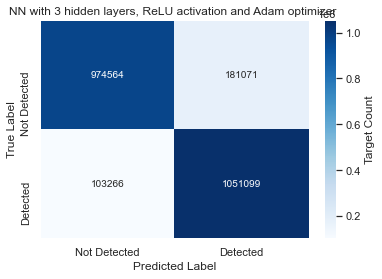

In [70]:
cm_3 = confusion_matrix(y_test, np.rint(ypred3))
ax = plt.axes()
x_axis_labels = ['Not Detected', 'Detected']
y_axis_labels = ['Not Detected', 'Detected']
sns.heatmap(cm_3, cmap='Blues', annot=True, fmt='d',xticklabels=x_axis_labels,
            yticklabels=y_axis_labels, ax=ax, cbar_kws={'label': 'Target Count',})
ax.set_title('NN with 5 hidden layers, ReLU activation and Adam optimizer ')
plt.xlabel("Predicted Label")
plt.ylabel("True Label") 
plt.show

In [71]:
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, np.rint(ypred3))
auc_keras3 = auc(nn_fpr_keras, nn_tpr_keras)
auc_keras3


0.8769288701202329

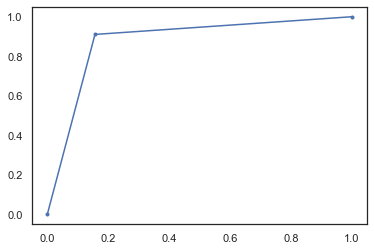

In [72]:

plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras3)


In [59]:
model2.compile(optimizer='sgd',loss='binary_crossentropy',
                   metrics=['accuracy',tf.keras.metrics.Precision(),
                            tf.keras.metrics.Recall(),
                            tf.keras.metrics.AUC()])

es = EarlyStopping(patience=2)
model2.fit(X_train, y_train, epochs=50, validation_data=(X_test,y_test), batch_size=1000,callbacks=[es])

Epoch 1/50
4690/4690 [==============================] - 147s 31ms/step - loss: 0.2625 - accuracy: 0.8820 - precision_5: 0.8664 - recall_5: 0.9036 - auc_5: 0.9566 - val_loss: 0.2676 - val_accuracy: 0.8796 - val_precision_5: 0.8640 - val_recall_5: 0.9009 - val_auc_5: 0.9549
Epoch 2/50
4690/4690 [==============================] - 159s 34ms/step - loss: 0.2618 - accuracy: 0.8824 - precision_5: 0.8669 - recall_5: 0.9036 - auc_5: 0.9568 - val_loss: 0.2676 - val_accuracy: 0.8796 - val_precision_5: 0.8627 - val_recall_5: 0.9029 - val_auc_5: 0.9549
Epoch 3/50
4690/4690 [==============================] - 149s 32ms/step - loss: 0.2616 - accuracy: 0.8825 - precision_5: 0.8670 - recall_5: 0.9038 - auc_5: 0.9569 - val_loss: 0.2675 - val_accuracy: 0.8797 - val_precision_5: 0.8656 - val_recall_5: 0.8987 - val_auc_5: 0.9550
Epoch 4/50
4690/4690 [==============================] - 144s 31ms/step - loss: 0.2614 - accuracy: 0.8826 - precision_5: 0.8671 - recall_5: 0.9039 - auc_5: 0.9570 - val_loss: 0.2673 

#### Graph-Training and Validation Loss using SGD optimizer

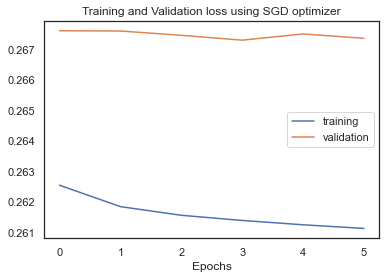

In [60]:
train_loss = model2.history.history['loss']
val_loss = model2.history.history['val_loss']
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Epochs')
plt.legend(['training','validation'])
plt.title('Training and Validation loss using SGD optimizer')
plt.show()

#### Graph-Training and Validation Accuracy using SGD optimizer

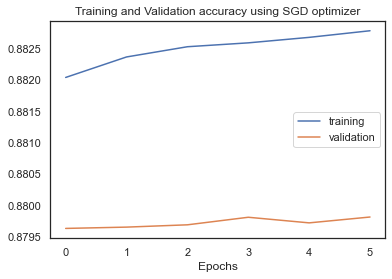

In [61]:
train_loss = model2.history.history['accuracy']
val_loss = model2.history.history['val_accuracy']
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Epochs')
plt.legend(['training','validation'])
plt.title('Training and Validation accuracy using SGD optimizer')
plt.show()

In [62]:
ypred4=model2.predict(X_test)

In [63]:
print(mt.classification_report(y_test, np.rint(ypred4)))
print('\n')
print('Confusion Matrix: \n', mt.confusion_matrix(y_test, np.rint(ypred4)))
print('\n')
print('Accuracy: \n', mt.accuracy_score(y_test, np.rint(ypred4)))


              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88   1155635
         1.0       0.86      0.90      0.88   1154365

    accuracy                           0.88   2310000
   macro avg       0.88      0.88      0.88   2310000
weighted avg       0.88      0.88      0.88   2310000



Confusion Matrix: 
 [[ 989499  166136]
 [ 111501 1042864]]


Accuracy: 
 0.8798108225108225


<function matplotlib.pyplot.show(close=None, block=None)>

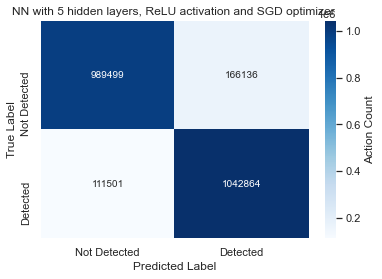

In [78]:
cm_4 = confusion_matrix(y_test, np.rint(ypred4))
ax = plt.axes()
x_axis_labels = ['Not Detected', 'Detected']
y_axis_labels = ['Not Detected', 'Detected']
sns.heatmap(cm_4, cmap='Blues', annot=True, fmt='d',xticklabels=x_axis_labels,
            yticklabels=y_axis_labels, ax=ax, cbar_kws={'label': 'Target Count',})
ax.set_title('NN with 5 hidden layers, ReLU activation and SGD optimizer ')
plt.xlabel("Predicted Label")
plt.ylabel("True Label") 
plt.show


In [73]:
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, np.rint(ypred4))
auc_keras4 = auc(nn_fpr_keras, nn_tpr_keras)
auc_keras4



0.8798237894000844

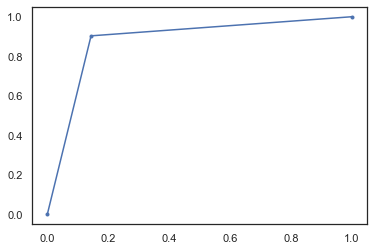

In [76]:
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras4)


In [28]:
!pip install shap
import shap

# load your data here, e.g. X and y
# create and fit your model here

# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model2)
shap_values = explainer.shap_values(X)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

shap.summary_plot(shap_values, X, plot_type="bar")


     |████████████████████████████████| 433 kB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 10.6 MB/s eta 0:00:01
  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sphinx 4.0.1 requires MarkupSafe<2.0, but you have markupsafe 2.0.1 which is incompatible.


NameError: name 'model2' is not defined